In [2]:
!pip install newsapi-python

In [25]:
import requests
import pandas as pd

def fetch_guardian_data(keywords, api_key):
    base_url = 'https://content.guardianapis.com/search'
    data = []

    for keyword in keywords:
        params = {
            'q': keyword,
            'api-key': api_key,
            'page-size': 50,  # Adjust this value based on the number of results you want per request
            'show-fields': 'headline',
            'lang': 'en',
            'order-by': 'relevance'
        }
        response = requests.get(base_url, params=params)
        json_data = response.json()

        for article in json_data['response']['results']:
            data.append([keyword, article['webTitle'], article['webUrl'], article['webPublicationDate']])

    data_df = pd.DataFrame(data, columns=['keyword', 'headline', 'url', 'publication_date'])
    return data_df

api_key = '74683c4f-3229-43e2-87f9-9a0a1b0c3910'
keywords = ['Elon Musk', 'Jeff Bezos', 'Warren Buffet', 'Bill Gates', 'Larry Ellison']
musk_df = fetch_guardian_data(keywords, api_key)
print(musk_df)


           keyword                                           headline  \
0        Elon Musk  Elon Musk reportedly planning to launch AI riv...   
1        Elon Musk  Elon Musk is the Basil Fawlty of social media ...   
2        Elon Musk  Twitter to promote only paying users’ tweets, ...   
3        Elon Musk  Letter signed by Elon Musk demanding AI resear...   
4        Elon Musk  Elon Musk backs Dilbert cartoonist Scott Adams...   
..             ...                                                ...   
245  Larry Ellison  From Curb to Kurt: Larry David’s director on h...   
246  Larry Ellison  Brexit isn’t to blame for our current problems...   
247  Larry Ellison  US ‘cult’ leader given 60 years in prison for ...   
248  Larry Ellison  Will plunging shares end big tech’s era of ‘po...   
249  Larry Ellison  What does the autumn statement have in store? ...   

                                                   url      publication_date  
0    https://www.theguardian.com/technology/

In [21]:
import requests
import pandas as pd

def fetch_guardian_data(keyword, api_key, start_date, end_date):
    base_url = 'https://content.guardianapis.com/search'
    data = []
    page = 1

    while True:
        params = {
            'q': keyword,
            'api-key': api_key,
            'page-size': 50,  # Adjust this value based on the number of results you want per request
            'show-fields': 'headline',
            'lang': 'en',
            'order-by': 'relevance',
            'from-date': start_date,
            'to-date': end_date,
            'page': page
        }
        response = requests.get(base_url, params=params)
        json_data = response.json()

        if 'response' not in json_data or 'results' not in json_data['response'] or not json_data['response']['results']:
            break

        for article in json_data['response']['results']:
            data.append([keyword, article['webTitle'], article['webUrl'], article['webPublicationDate']])

        page += 1

    data_df = pd.DataFrame(data, columns=['keyword', 'headline', 'url', 'publication_date'])
    return data_df

api_key = '74683c4f-3229-43e2-87f9-9a0a1b0c3910'
keyword = 'Elon Musk'
start_date = '2013-01-01'
end_date = '2022-12-31'
musk_df = fetch_guardian_data(keyword, api_key, start_date, end_date)
print(musk_df)


        keyword                                           headline  \
0     Elon Musk           Elon Musk sells Tesla shares worth $4bn    
1     Elon Musk  Elon Musk reinstates Twitter accounts of suspe...   
2     Elon Musk         Will Elon Musk really let Twitter go bust?   
3     Elon Musk   Elon Musk scraps Twitter’s work from home policy   
4     Elon Musk  Twitter’s rulebook in a nutshell: don’t annoy ...   
...         ...                                                ...   
3081  Elon Musk       Rise of the new geeks: how the outsiders won   
3082  Elon Musk  Global Warning: 24 hours on the climate change...   
3083  Elon Musk  Bayer Leverkusen v Manchester United – as it h...   
3084  Elon Musk  The Ashes: England v Australia – day one as it...   
3085  Elon Musk  New Zealand v England – day one as it happened...   

                                                    url      publication_date  
0     https://www.theguardian.com/technology/2022/no...  2022-11-09T03:48:06Z  

In [11]:
data_df.to_csv("Guardian_musk.csv", index=False)

In [26]:
import requests
import pandas as pd

def fetch_guardian_data(keyword, api_key, start_date, end_date):
    base_url = 'https://content.guardianapis.com/search'
    data = []
    page = 1

    while True:
        params = {
            'q': keyword,
            'api-key': api_key,
            'page-size': 50,  # Adjust this value based on the number of results you want per request
            'show-fields': 'headline',
            'lang': 'en',
            'order-by': 'relevance',
            'from-date': start_date,
            'to-date': end_date,
            'page': page
        }
        response = requests.get(base_url, params=params)
        json_data = response.json()

        if 'response' not in json_data or 'results' not in json_data['response'] or not json_data['response']['results']:
            break

        for article in json_data['response']['results']:
            data.append([keyword, article['webTitle'], article['webUrl'], article['webPublicationDate']])

        page += 1

    data_df = pd.DataFrame(data, columns=['keyword', 'headline', 'url', 'publication_date'])
    return data_df

api_key = '74683c4f-3229-43e2-87f9-9a0a1b0c3910'
keyword = 'Jeff Bezos'
start_date = '2013-01-01'
end_date = '2022-12-31'
bezos_df = fetch_guardian_data(keyword, api_key, start_date, end_date)
print(bezos_df)


       keyword                                           headline  \
0   Jeff Bezos  Jeff Bezos sued by former housekeeper alleging...   
1   Jeff Bezos  Jeff Bezos vows to give away most of fortune –...   
2   Jeff Bezos  All hail Jeff Bezos the philanthropist! The re...   
3   Jeff Bezos  Uju Anya on the Queen, Jeff Bezos and the fami...   
4   Jeff Bezos  Jeff Bezos questions China’s influence over El...   
..         ...                                                ...   
95  Jeff Bezos  What links The Lord of the Rings to Lenny Henr...   
96  Jeff Bezos  The Succession quiz: who said it – a real-life...   
97  Jeff Bezos  Amazon could run out of workers in US in two y...   
98  Jeff Bezos  Bezos-backed Rivian revs up for $65bn valuatio...   
99  Jeff Bezos  Stephen Colbert on climate denial: ‘Like not b...   

                                                  url      publication_date  
0   https://www.theguardian.com/technology/2022/no...  2022-11-03T12:23:19Z  
1   https://www

In [13]:
data_df.to_csv("Guardian_bezos.csv", index=False)

In [30]:
import requests
import pandas as pd

def fetch_guardian_data(keyword, api_key, start_date, end_date):
    base_url = 'https://content.guardianapis.com/search'
    data = []
    page = 1

    while True:
        params = {
            'q': keyword,
            'api-key': api_key,
            'page-size': 10,  # Adjust this value based on the number of results you want per request
            'show-fields': 'headline',
            'lang': 'en',
            'order-by': 'relevance',
            'from-date': start_date,
            'to-date': end_date,
            'page': page
        }
        response = requests.get(base_url, params=params)
        json_data = response.json()

        if 'response' not in json_data or 'results' not in json_data['response'] or not json_data['response']['results']:
            break

        for article in json_data['response']['results']:
            data.append([keyword, article['webTitle'], article['webUrl'], article['webPublicationDate']])

        page += 1

    data_df = pd.DataFrame(data, columns=['keyword', 'headline', 'url', 'publication_date'])
    return data_df

api_key = '74683c4f-3229-43e2-87f9-9a0a1b0c3910'
keyword = 'Warren Buffet'
start_date = '2013-01-01'
end_date = '2022-12-31'
buffet_df = fetch_guardian_data(keyword, api_key, start_date, end_date)
print(buffet_df)


          keyword                                           headline  \
0   Warren Buffet  The moment I knew: ‘A buffet of international ...   
1   Warren Buffet  Aroma Buffet, London W12: ‘Delivering joy thou...   
2   Warren Buffet  The Quarry review – engrossing buffet of horro...   
3   Warren Buffet  Warren pushes bipartisan bill to regulate cryp...   
4   Warren Buffet  Warren Gatland returns to Wales as head coach ...   
5   Warren Buffet  Mumsnet is aflame over the family who wore pyj...   
6   Warren Buffet  ‘We can’t wait for hydrogen’: Rolls-Royce’s Wa...   
7   Warren Buffet  Warren Beatty sued for allegedly coercing teen...   
8   Warren Buffet  Nick Cave and Warren Ellis review – a transcen...   
9   Warren Buffet                               Mona Warren obituary   
10  Warren Buffet  Frank Warren: Tyson Fury v Oleksandr Usyk heav...   
11  Warren Buffet  Mrs Warren’s Profession review – Caroline Quen...   
12  Warren Buffet  Man guilty of killing Shani Warren 35 years a

In [15]:
data_df.to_csv("Guardian_buffet.csv", index=False)

In [29]:
import requests
import pandas as pd

def fetch_guardian_data(keyword, api_key, start_date, end_date):
    base_url = 'https://content.guardianapis.com/search'
    data = []
    page = 1

    while True:
        params = {
            'q': keyword,
            'api-key': api_key,
            'page-size': 50,  # Adjust this value based on the number of results you want per request
            'show-fields': 'headline',
            'lang': 'en',
            'order-by': 'relevance',
            'from-date': start_date,
            'to-date': end_date,
            'page': page
        }
        response = requests.get(base_url, params=params)
        json_data = response.json()

        if 'response' not in json_data or 'results' not in json_data['response'] or not json_data['response']['results']:
            break

        for article in json_data['response']['results']:
            data.append([keyword, article['webTitle'], article['webUrl'], article['webPublicationDate']])

        page += 1

    data_df = pd.DataFrame(data, columns=['keyword', 'headline', 'url', 'publication_date'])
    return data_df

api_key = '74683c4f-3229-43e2-87f9-9a0a1b0c3910'
keyword = 'Bill Gates'
start_date = '2013-01-01'
end_date = '2022-12-31'
gates_df = fetch_guardian_data(keyword, api_key, start_date, end_date)
print(gates_df)

        keyword                                           headline  \
0    Bill Gates              Send us your questions for Bill Gates   
1    Bill Gates  ‘The strain is the worst of my lifetime’: how ...   
2    Bill Gates  Like Bill Gates before him, Mark Zuckerberg is...   
3    Bill Gates  Bill Gates pledges to donate ‘virtually all’ o...   
4    Bill Gates  Melinda French Gates says she is ‘friendly’ bu...   
..          ...                                                ...   
145  Bill Gates  Labour’s energy bill freeze makes more sense p...   
146  Bill Gates  Republicans vote against insulin bill as price...   
147  Bill Gates  Starmer strayed in failing to propose targeted...   
148  Bill Gates  Greater Manchester arts complex faces £1m ener...   
149  Bill Gates  Community groups will close without energy bil...   

                                                   url      publication_date  
0    https://www.theguardian.com/us-news/2022/apr/1...  2022-04-15T07:00:24Z  
1

In [17]:
data_df.to_csv("Guardian_gates.csv", index=False)

In [18]:
import requests
import pandas as pd

def fetch_guardian_data(keyword, api_key, start_date, end_date):
    base_url = 'https://content.guardianapis.com/search'
    data = []
    page = 1

    while True:
        params = {
            'q': keyword,
            'api-key': api_key,
            'page-size': 50,  # Adjust this value based on the number of results you want per request
            'show-fields': 'headline',
            'lang': 'en',
            'order-by': 'relevance',
            'from-date': start_date,
            'to-date': end_date,
            'page': page
        }
        response = requests.get(base_url, params=params)
        json_data = response.json()

        if 'response' not in json_data or 'results' not in json_data['response'] or not json_data['response']['results']:
            break

        for article in json_data['response']['results']:
            data.append([keyword, article['webTitle'], article['webUrl'], article['webPublicationDate']])

        page += 1

    data_df = pd.DataFrame(data, columns=['keyword', 'headline', 'url', 'publication_date'])
    return data_df

api_key = '74683c4f-3229-43e2-87f9-9a0a1b0c3910'
keyword = 'Larry Ellison'
start_date = '2013-01-01'
end_date = '2022-12-31'
data_df = fetch_guardian_data(keyword, api_key, start_date, end_date)
print(data_df)

            keyword                                           headline  \
0     Larry Ellison                             Larry Rudling obituary   
1     Larry Ellison                                 Larry Rew obituary   
2     Larry Ellison           Larry the cat takes on fox outside No 10   
3     Larry Ellison  Cat v fox: what made Downing Street’s Larry so...   
4     Larry Ellison                              Larry Herman obituary   
...             ...                                                ...   
8668  Larry Ellison                      G8 summit: Politics live blog   
8669  Larry Ellison  New Zealand v England – live! | Tom Davies and...   
8670  Larry Ellison  Osborne announces spending review 2013: Politi...   
8671  Larry Ellison  India v England – live! | Rob Smyth and Ian Mc...   
8672  Larry Ellison         Margaret Thatcher dies: news and reaction    

                                                    url      publication_date  
0     https://www.theguardian.c

In [19]:
data_df.to_csv("Guardian_ellison.csv", index=False)

In [3]:
import pandas as pd

In [4]:
df_musk = pd.read_csv("Guardian_musk.csv")

In [33]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ----- --------------------------------- 92.2/636.8 kB 2.6 MB/s eta 0:00:01
     ----------------- -------------------- 286.7/636.8 kB 4.4 MB/s eta 0:00:01
     ---------------------------------- --- 583.7/636.8 kB 5.3 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 4.4 MB/s eta 0:00:00


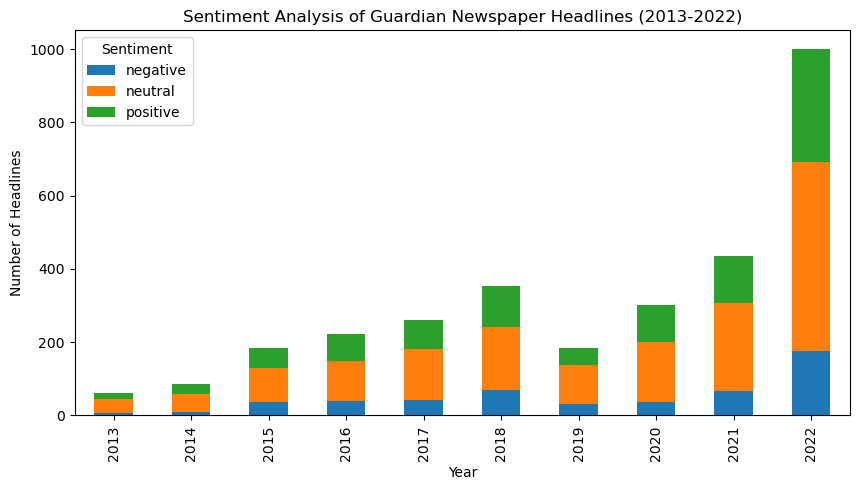

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis on the headlines
df['sentiment'] = df['headline'].apply(analyze_sentiment)

# Convert publication_date to datetime object and extract year
df['publication_date'] = pd.to_datetime(df['publication_date'])
df['year'] = df['publication_date'].dt.year

# Group by year and sentiment
sentiment_by_year = df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plot the results
sentiment_by_year.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Analysis of Guardian Newspaper Headlines (2013-2022)')
plt.legend(title='Sentiment', loc='upper left')
plt.show()

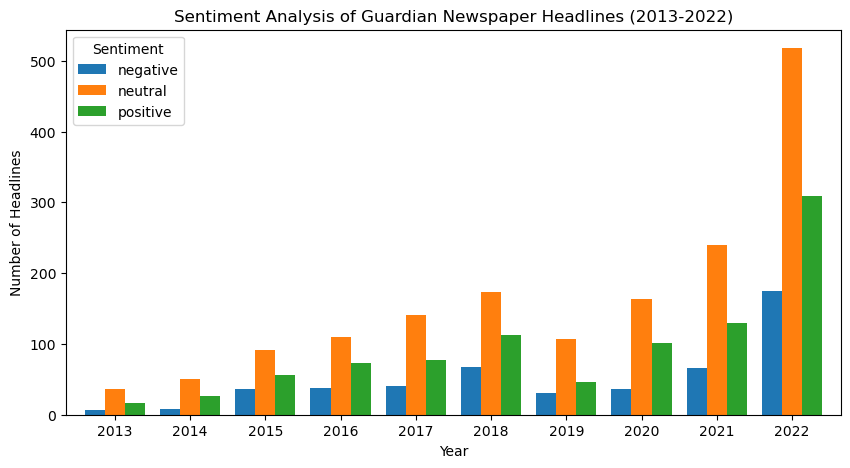

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load your dataset
# df_musk = pd.read_csv('your_dataset.csv')

def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis on the headlines
df_musk['sentiment'] = df_musk['headline'].apply(analyze_sentiment)

# Convert publication_date to datetime object and extract year
df_musk['publication_date'] = pd.to_datetime(df_musk['publication_date'])
df_musk['year'] = df_musk['publication_date'].dt.year

# Group by year and sentiment
sentiment_by_year = df_musk.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plot the results
sentiment_by_year.plot(kind='bar', figsize=(10, 5), width=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Analysis of Guardian Newspaper Headlines (2013-2022)')
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=0)
plt.show()


In [35]:
df_bezos = pd.read_csv("Guardian_bezos.csv")

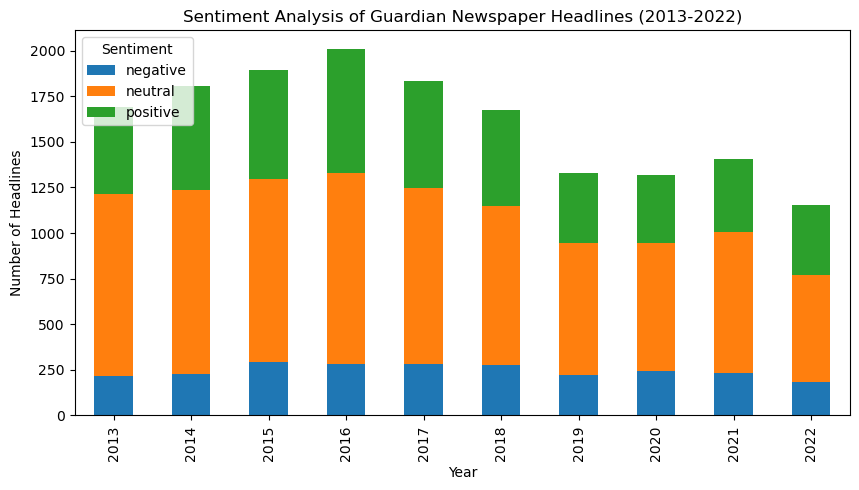

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load your dataset
# df_bezos = pd.read_csv('your_dataset.csv')

def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis on the headlines
df_bezos['sentiment'] = df_bezos['headline'].apply(analyze_sentiment)

# Convert publication_date to datetime object and extract year
df_bezos['publication_date'] = pd.to_datetime(df_bezos['publication_date'])
df_bezos['year'] = df_bezos['publication_date'].dt.year

# Group by year and sentiment
sentiment_by_year = df_bezos.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plot the results
sentiment_by_year.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Analysis of Guardian Newspaper Headlines (2013-2022)')
plt.legend(title='Sentiment', loc='upper left')
plt.show()


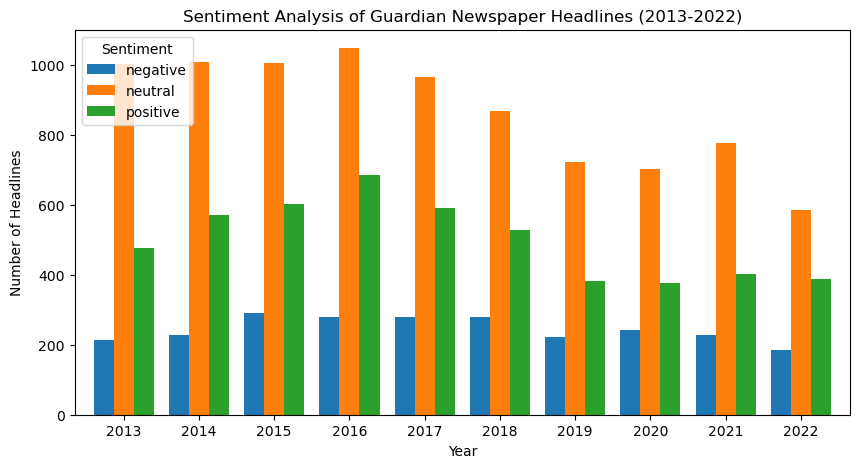

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load your dataset
# df_bezos = pd.read_csv('your_dataset.csv')

def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis on the headlines
df_bezos['sentiment'] = df_bezos['headline'].apply(analyze_sentiment)

# Convert publication_date to datetime object and extract year
df_bezos['publication_date'] = pd.to_datetime(df_bezos['publication_date'])
df_bezos['year'] = df_bezos['publication_date'].dt.year

# Group by year and sentiment
sentiment_by_year = df_bezos.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plot the results
sentiment_by_year.plot(kind='bar', figsize=(10, 5), width=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Analysis of Guardian Newspaper Headlines (2013-2022)')
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=0)
plt.show()


## Sentiment Distribution

In [6]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity

    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

df_musk['sentiment'] = df_musk['headline'].apply(get_sentiment)


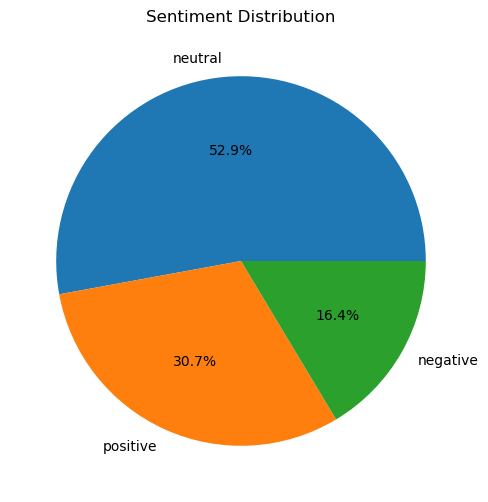

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df_musk['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

## Word Cloud

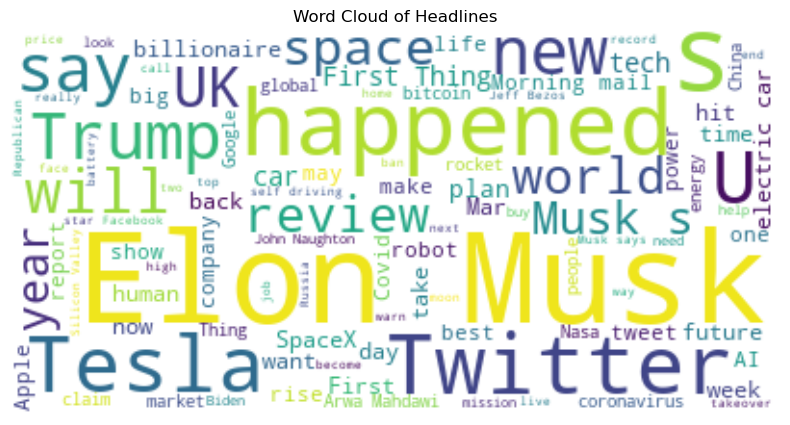

In [8]:
from wordcloud import WordCloud

all_headlines = ' '.join(df_musk['headline'].values)
wordcloud = WordCloud(background_color='white', max_words=100).generate(all_headlines)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()

## Top Keywords

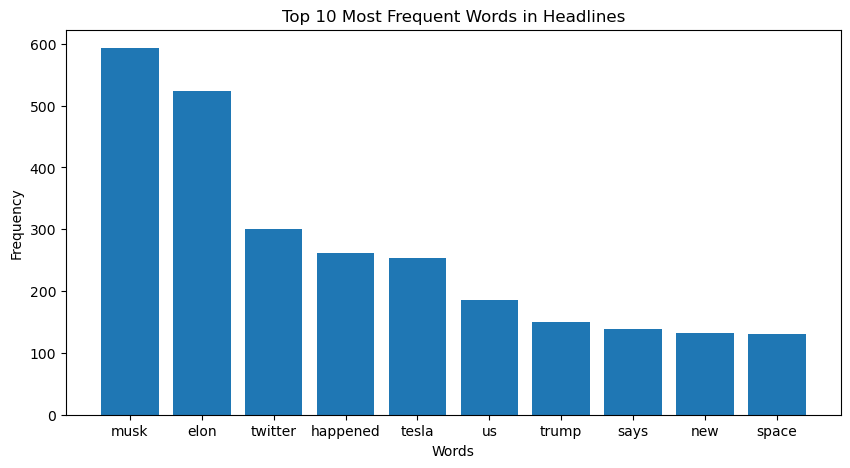

In [10]:
import re
from collections import Counter
from nltk.corpus import stopwords
from string import punctuation

stop_words = set(stopwords.words('english'))

def tokenize(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)  # use regex to extract words
    words = [w for w in words if w not in stop_words]
    return words

all_words = []
for headline in df_musk['headline']:
    all_words.extend(tokenize(headline))

word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

plt.figure(figsize=(10, 5))
plt.bar([w[0] for w in top_words], [w[1] for w in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Headlines')
plt.show()


## Monthly Sentiment Trend

C:\Users\jeetp\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

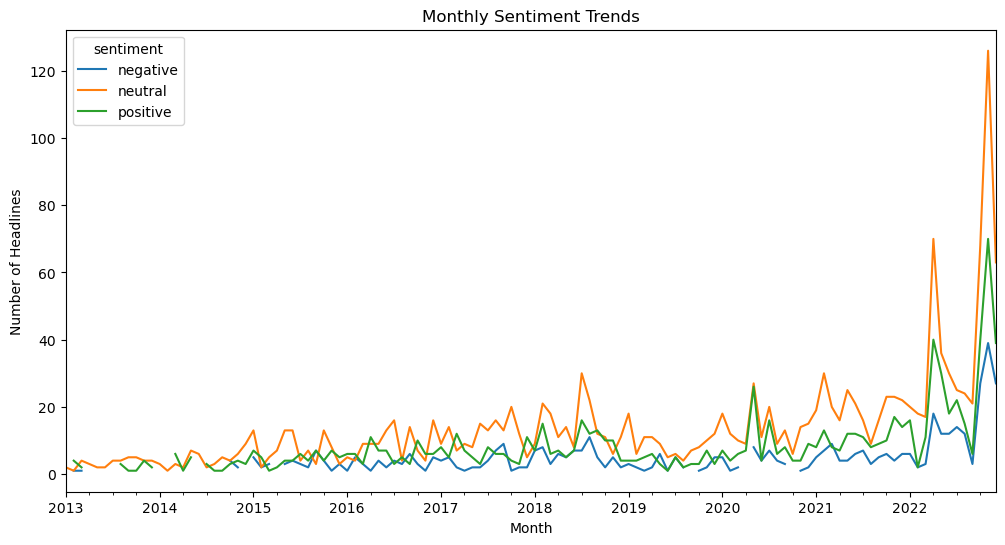

In [12]:
df_musk['date'] = pd.to_datetime(df_musk['publication_date'])
df_musk['month_year'] = df_musk['date'].dt.to_period('M')

monthly_sentiment = df_musk.groupby(['month_year', 'sentiment']).size().unstack()

plt.figure(figsize=(12, 6))
monthly_sentiment.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Sentiment Trends')
plt.xlabel('Month')
plt.ylabel('Number of Headlines')
plt.show()

## Headline Length vs Sentiment

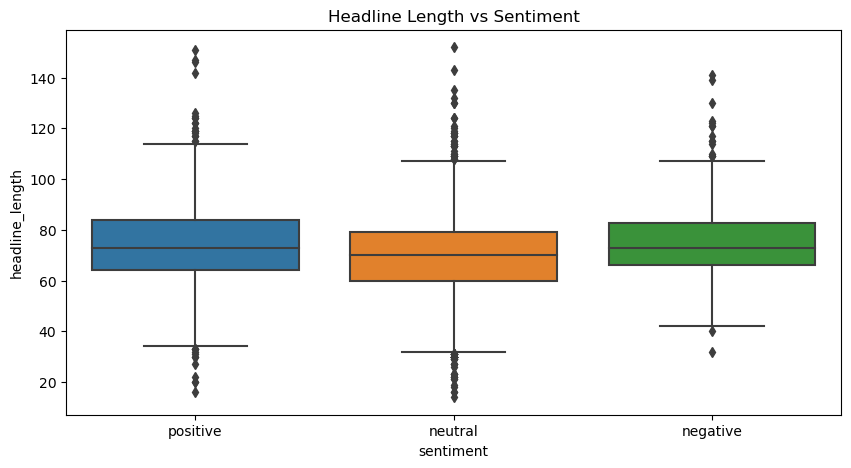

In [14]:
df_musk['headline_length'] = df_musk['headline'].apply(len)

plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment', y='headline_length', data=df_musk)
plt.title('Headline Length vs Sentiment')
plt.show()

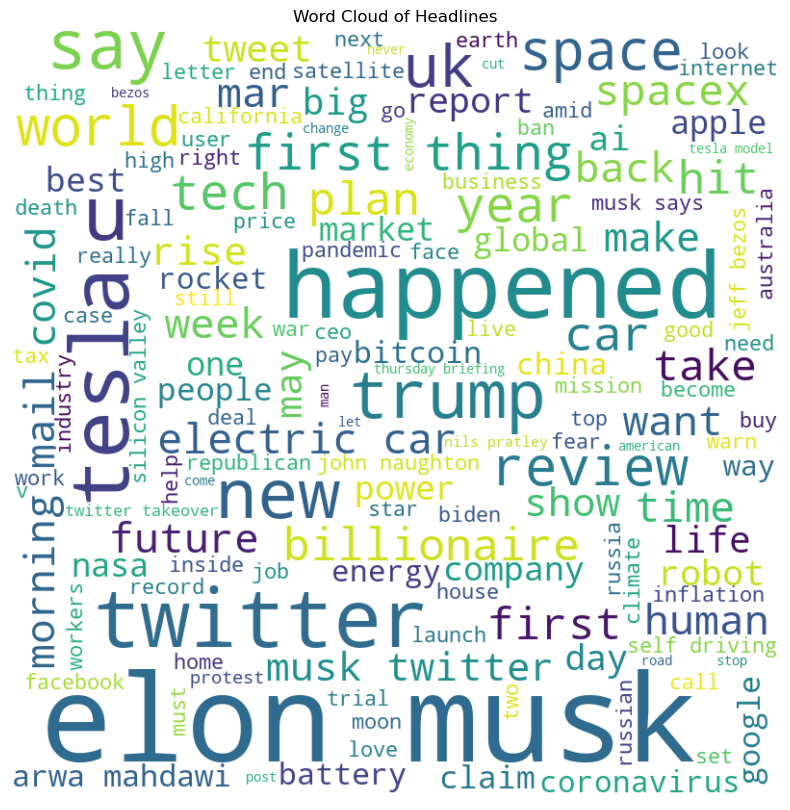

In [15]:
from wordcloud import WordCloud

# Generate word cloud from the headlines
wordcloud = WordCloud(width=800, height=800, max_words=150, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()


## Sentiment by Year:

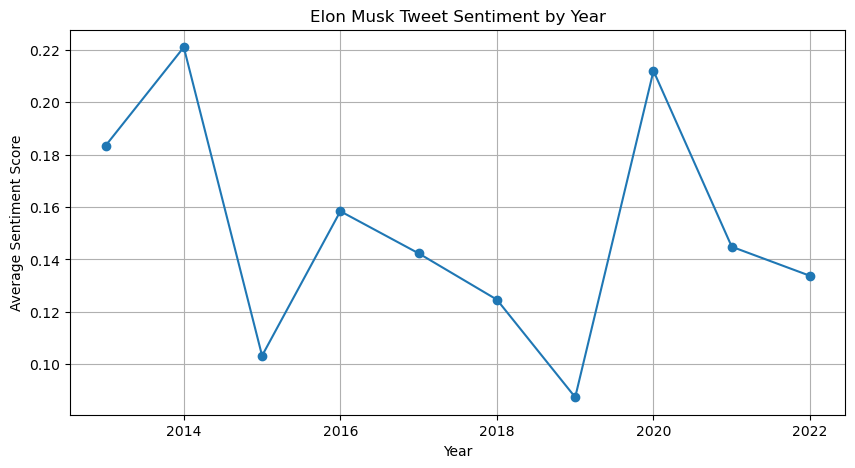

In [19]:
# Convert the 'sentiment' column to numeric values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df_musk['sentiment_numeric'] = df_musk['sentiment'].map(sentiment_mapping)

# Group data by year and calculate the average sentiment score
sentiment_by_year = df_musk.groupby('year')['sentiment_numeric'].mean()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(sentiment_by_year.index, sentiment_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.title('Elon Musk Tweet Sentiment by Year')
plt.grid()
plt.show()
